## Introduction

Understand the creditworthiness of a customer is a key task for banks. In this project, we will use the data from a German bank to build a credit scoring model to predict the probability of default. The data is from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)).
The data contains 1000 entries with 20 features. The features are a mix of numeric and categorical variables. The target variable is a binary variable indicating whether the customer is a good or bad credit risk. The data is split into 700 training and 300 testing samples. The goal is to build a model to predict the probability of default for the testing samples.

While extension of credit can be traced back to babylonian times, the history of credit scoring classification can be traced back to a 1941 study distinguish good loans from bad loans [@durand.1941;@crook.2006]. The first credit scoring model was developed in 1958 by Fair Isaac Corporation (FICO). The FICO score is still the most widely used credit score in the world. The FICO score is based on a logistic regression model. In this project, we will build a logistic regression model and compare its performance with other machine learning models.

To understand the modelling of credit risk using artificial intelligence (AI) and machine learning we first perform a systematic literature review using using bibliometric techniques on the measure of science[@goden.2006].  Specifically we using the python package `pybliometrics` to query the Scopus database using their API. To further improve the quality of the bibliometric search we using an objective measure of journal quality known as the Eigenfactor metrics.

Journal Impact Factors (JIFs) have long been a popular metric for evaluating the quality of academic journals. They are calculated by dividing the number of citations a journal receives in a given year by the total number of citable items published in that journal during the preceding two years. However, JIFs have been the subject of much criticism, primarily due to their potential for manipulation, bias, and incentivising questionable research practices (Seglen, 1997; Brembs et al., 2013).

Variations in citation practices, differing lag between publication and citation, differing use of JCR-indexed literature for citation and distinct levels of impact factor inflation across research fields contribute to this challenge [@althouse.2008].  As the subject of this report is a mix of finance and computer science disciplines we choose the Source Normalised Impact per Paper (SNIP)[^1], as a multidisciplinary measure of journal impact [@mingers.2007].

[^1]: SNIP is defined as the ratio of a journal’s citation count per paper and the citation potential in its subject field. The citation potential is defined as the average number of references per paper in a subject field. The subject field is defined based on the subject classification of the citing document. The SNIP indicator is a ratio that expresses the average citation count per paper of a journal relative to the citation potential in its subject field. The higher the SNIP, the higher the contextual citation impact of the journal. The SNIP indicator is especially useful for comparing journals from different subject fields, as citation practices vary widely between fields. The SNIP indicator is calculated based on the Scopus database (Elsevier, 2019).

In [1]:
from pybliometrics.scopus import ScopusSearch
from tabulate import tabulate
import pandas as pd
query = r' TITLE-ABS-KEY(("artificial intelligence" OR "machine learning") AND ("credit scoring"))'
s=ScopusSearch(query)
print(s.get_results_size()) 
df=pd.DataFrame(s.results)
df.to_csv('scopus_2023.csv')
#jcr=pd.read_csv('jcr_2021.csv')

621


The above code using the Scopus API to perform an initital literature review of application of AI and machine learning in credit scoring.  Using a Scopus search `TITLE-ABS-KEY(("artificial intelligence" OR "machine learning") AND ("credit risk" OR "credit scoring"))` we find that there have been 621 academic papers published.

In [2]:
# Download the SNIP data from scopus using a unique list of ISSNs
issns=df['issn'].unique()
from pybliometrics.scopus import SerialTitle
# iteratve through the issn using SertialTitle class and save results in dataframe
df_snip=pd.DataFrame()
for issn in issns:
    try:
        st = SerialTitle(issn)
        df_snip=df_snip.append(st.snip)
    except:
        pass
df_snip.to_csv('snip_2023.csv')

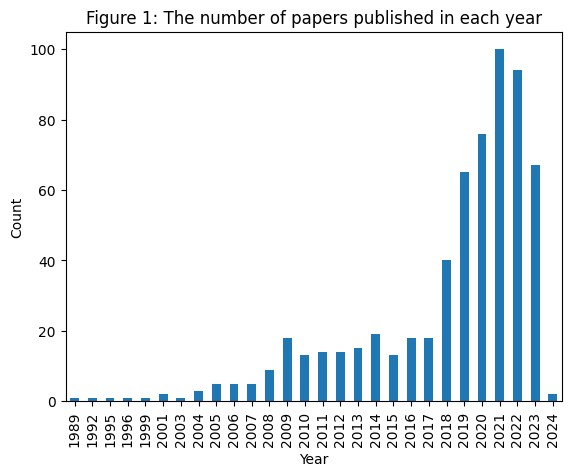

In [3]:
# plot the count of the papers published in each year
import matplotlib.pyplot as plt
df['year']=df['coverDate'].apply(lambda x: x.split('-')[0])
df['year']=df['year'].astype(int)
df['year'].value_counts().sort_index().plot(kind='bar')
# Give the plot a title
plt.title("Figure 1: The number of papers published in each year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

Figure 1 shows the raw number of papers published by year.  We can see that the number of papers published has increased dramatically since 2015.  This is consistent with the increase in the number of papers published in the field of AI and machine learning in general, and that credit scoring is one of the most popular applications of AI and machine learning in the finance industry.

In [5]:
# convert top 5 cited articles into a bibtex file
import os
import bibtexparser
from bibtexparser.bwriter import BibTexWriter
from bibtexparser.bibdatabase import BibDatabase
df=df.sort_values(by=['citedby_count'],ascending=False)
df_top5=df.head()
db = BibDatabase()
for index, row in df_top5.iterrows():
    db.entries.append({'title': row['title'],'author':row['authors'],'journal':row['publicationName'],'year':row['coverDate'],'volume':row['volume'],'number':row['issueIdentifier'],'pages':row['pageRange'],'doi':row['doi'],'url':row['scopus_link']})
writer = BibTexWriter()
writer.indent = '  '     # indent entries with 4 spaces instead of one
with open('top5.bib', 'w') as bibfile:
    bibfile.write(writer.write(db))

ModuleNotFoundError: No module named 'bibtexparser'

In [19]:
from tabulate import tabulate
# Function to wrap text
def wrap_text(text, max_width=30):
    chunks = [text[i:i+max_width] for i in range(0, len(text), max_width)]
    return '\n'.join(chunks)

# subject total 5 publication by citation count
df=df.sort_values(by='citedby_count',ascending=False)
data=df[['title','citedby_count','subtypeDescription','coverDisplayDate','publicationName','description']].head()

# Wrap large text entries
data['description'] = data['description'].apply(wrap_text,max_width=60)
data['title'] = data['title'].apply(wrap_text)
data['publicationName'] = data['publicationName'].apply(wrap_text)

# Generate table with a title and pipe format
print('## Table 1: Top 5 papers by citation count')
print(tabulate(data,
               headers=['Title','Citations',"Flavour",'Date Published','Journal','Abstract'], 
               numalign='left', tablefmt='pipe',showindex=False))

## Top 5 papers by citation count
| Title                          | Citations   | Flavour   | Date Published   | Journal                        | Abstract                                                     |
|:-------------------------------|:------------|:----------|:-----------------|:-------------------------------|:-------------------------------------------------------------|
| A few useful things to know ab | 1727        | Review    | October 2012     | Communications of the ACM      | MACHINE LEARNING SYSTEMS automatically learn programs from d |
| out machine learning           |             |           |                  |                                | ata. This is often a very attractive alternative to manually |
|                                |             |           |                  |                                |  constructing them, and in the last decade the use of machin |
|                                |             |           |                  |       

When we consider the top 5 cited papers from our Scopus search in Table 1, the top three are not directly related to credit scoring and AI rather review style papers. Interestingly, 

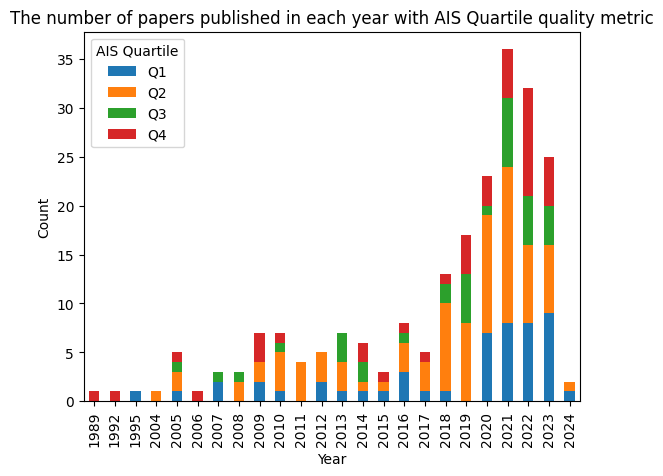

In [6]:
# plot the count of the papers published in each year in df_q using the AIS Quartile columns to colour the bars
import matplotlib.pyplot as plt
df_q['year']=df_q['coverDate'].apply(lambda x: x.split('-')[0])
df_q['year']=df_q['year'].astype(int)
# Drop the rows where the AIS Quartile is missing
df_q_plot=df_q[df_q['AIS Quartile'].notnull()]
# create a stacked plot of the number of papers published in each year with AIS Quartile quality metric
df_q_plot.groupby(['year','AIS Quartile']).size().unstack().plot(kind='bar',stacked=True)
# Give the plot a title
plt.title("The number of papers published in each year with AIS Quartile quality metric")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [19]:
abs=pd.read_csv('JCR_ABS.csv')
abs=abs[abs['ISSN'].notnull()]
abs[abs['Journal name'].str.title()=="Journal Of Accounting & Economics"]

,ISSN,Field,Journal Title,Publisher Name,Scopus,Web of Science™,AJG 2021,AJG 2018,AJG 2015,ABS 2010,...,JIF Percentile,JIF Quartile,AIS Quartile,Citable Items,% of Articles in Citable items,Cited Half-Life,Citing Half-Life,Total Articles,eISSN,ISSN.x
2,1879-1980,ACCOUNT,Journal of Accounting and Economics,Elsevier,scopus,WoS,4*,4*,4*,4.0,...,94.14,Q1,Q1,50.0,100%,14.9,11.0,50.0,NaN,NaN


In [22]:
# Filter the scopus search on the top 5 cited articles
from tabulate import tabulate
df_q_plot=df_q_plot.sort_values(by='Article Influence Score',ascending=False)
tab_fmt=tabulate(df_q_plot[['title','AIS Quartile','Article Influence Score','publicationName','coverDisplayDate','description']].head(),
               headers=['Title','Ranking','Article Influence Score',"Journal",'Date Published','Abstract','Ranking'], 
               numalign='left', tablefmt='plain',showindex=False,stralign='left',colalign='left')
print(tab_fmt)

                                                                                                                     Title    Ranking    Article Influence Score                                   Journal  Date Published    Abstract
Machine + man: A field experiment on the role of discretion in augmenting AI-based lending models                           Q1         5.728                      Journal of Accounting and Economics       1 November 2020   We assess the role of human discretion in lending outcomes using a randomized, controlled experiment. The lenders in our sample utilize a third party, machine-generated credit model as an input in their decision. We design a new feature for the credit-scoring platform – the slider feature – which invites lenders to incorporate additional discretion in their decision by adjusting the machine-based recommendation. We compare the loan outcomes for treatment lenders that randomly get the slider, relative to a control group. The treatment group's

In [48]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

1. Eyeball the raw data
2. Check the data types
3. Check the missing values
4. Check the outliers
5. Check the correlations
6. descriptive statistics for numerical variables
7. descriptive statistics for categorical variables


In [49]:
# load the data
dat_raw =pd.read_csv('credit.csv')
dat_raw.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [50]:
# check the data for missing values
dat_raw.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [51]:
# check data for categorical variables
dat_raw.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [52]:
# run descriptive statistics and transpose the output then use tabulate to display the output
from tabulate import tabulate
sum_stats=dat_raw.describe().transpose()
print(tabulate(sum_stats, headers='keys', tablefmt='psql'))

+----------------------+---------+----------+-------------+-------+--------+--------+---------+-------+
|                      |   count |     mean |         std |   min |    25% |    50% |     75% |   max |
|----------------------+---------+----------+-------------+-------+--------+--------+---------+-------|
| months_loan_duration |    1000 |   20.903 |   12.0588   |     4 |   12   |   18   |   24    |    72 |
| amount               |    1000 | 3271.26  | 2822.74     |   250 | 1365.5 | 2319.5 | 3972.25 | 18424 |
| percent_of_income    |    1000 |    2.973 |    1.11871  |     1 |    2   |    3   |    4    |     4 |
| years_at_residence   |    1000 |    2.845 |    1.10372  |     1 |    2   |    3   |    4    |     4 |
| age                  |    1000 |   35.546 |   11.3755   |    19 |   27   |   33   |   42    |    75 |
| existing_loans_count |    1000 |    1.407 |    0.577654 |     1 |    1   |    1   |    2    |     4 |
| dependents           |    1000 |    1.155 |    0.362086 |     

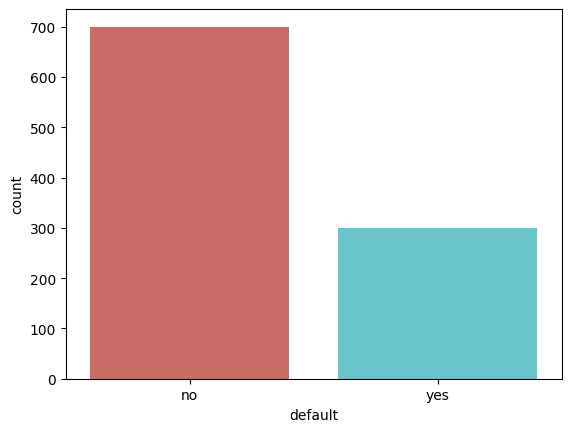

In [53]:
# check the distribution of the target variable
sns.countplot(x='default',data=dat_raw, palette='hls')
plt.show()

In [54]:
# run descriptive statistics for the categorical features
sum_stat=dat_raw.describe(include=['object']).transpose()
print(tabulate(sum_stat, headers='keys', tablefmt='psql'))

+---------------------+---------+----------+----------------------+--------+
|                     |   count |   unique | top                  |   freq |
|---------------------+---------+----------+----------------------+--------|
| checking_balance    |    1000 |        4 | unknown              |    394 |
| credit_history      |    1000 |        5 | good                 |    530 |
| purpose             |    1000 |        6 | furniture/appliances |    473 |
| savings_balance     |    1000 |        5 | < 100 DM             |    603 |
| employment_duration |    1000 |        5 | 1 - 4 years          |    339 |
| other_credit        |    1000 |        3 | none                 |    814 |
| housing             |    1000 |        3 | own                  |    713 |
| job                 |    1000 |        4 | skilled              |    630 |
| phone               |    1000 |        2 | no                   |    596 |
| default             |    1000 |        2 | no                   |    700 |

In [55]:
#  load the raw data and use the LabelEncoder() function to convert the categorical features to numeric
from sklearn.preprocessing import LabelEncoder
dat=dat_raw.copy()
le=LabelEncoder()

In [56]:
# find the categorical variables in the data then using the label encoder to convert them to numeric
cat_vars=dat.select_dtypes(include=['object']).columns
for col in cat_vars:
    dat[col]=le.fit_transform(dat[col])


In [65]:
# Define the gym environment
import gym
from gym import spaces
import pandas as pd
import numpy as np

class CreditScoringEnv(gym.Env):
    def __init__(self, data):
        self.data = data
        super(CreditScoringEnv, self).__init__()
        
        # Action Space: Default yes or no (1 or 0) this is not the action but a precursor to the action
        self.action_space = spaces.Discrete(2)
        
        # State Space: You can define as many features as relevant from the data
        # Assuming using age, income, credit score
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(3,))
        

    def reset(self):
        self.current_step = 0
        return self.data.iloc[self.current_step].values

    def step(self, action):
        self.current_step += 1

    # Terminal state
        if self.current_step >= len(self.data):
            done = True
            self.current_step = 0  # Reset for the next episode
            return None, 0, done, {}
        
        state = self.data.iloc[self.current_step].values
        reward = self.get_reward(state, action)
    
        return state, reward, False, {}
        
    def get_reward(self, state, action):
        # Define your reward function based on the state and action
        # For simplicity, assume that approving a good loan gets +1
        # and approving a bad loan gets -2 reward.
        # You would normally use a more complex function based on the data.
        if state[-1] == 1 and action == 1:  # Good loan and approved
            return 1
        elif state[-1] == 0 and action == 1:  # Bad loan and approved
            return -2
        else:
            return 0  # Otherwise, no reward or loss


In [66]:
# split the data into states and actions
states_x=dat.drop(['default'],axis=1)
actions_y=dat['default']
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
states_x_scaled=scaler.fit_transform(states_x)
# split the data into training and testing sets
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(actions_y,states_x_scaled,test_size=.3,random_state=123)
# Convert the numpy array back to DataFrame
states_x_scaled_df = pd.DataFrame(states_x_scaled, columns=states_x.columns)
# Concatenate
dat_combined = pd.concat([states_x_scaled_df, actions_y], axis=1)

In [68]:
# Reinforcement Learning
import random
 #Initialize the Gym environment with the new DataFrame
env = CreditScoringEnv(data=dat_combined)
state = env.reset()

# Initialize Q-table with zeros
Q = np.zeros([len(env.data), env.action_space.n])

# Hyperparameters
alpha = 0.1
gamma = 0.9
epsilon = 1.0

# Training the Q-learning model
for episode in range(1, 10001):
    done = False
    while not done:
        print(f'Type of state: {type(state)}, Type of action: {type(action)}')
        print(f'Value of state: {state}, Value of action: {action}')

        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
        
        next_state, reward, done, _ = env.step(action)
        
        # Update Q-value using the Bellman equation for Q-learning which is defined as:
        # Q(s,a) = (1 - alpha) * Q(s,a) + alpha * (reward + gamma * max Q(s',a')) DOUBLE CHECK THIS
        old_value = Q[state, action]
        next_max = np.max(Q[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        Q[state, action] = new_value
        
        state = next_state
    
    # Reduce epsilon to shift from exploration to exploitation (i.e. less random actions as the agent learns)
    if epsilon > 0.01:
        epsilon *= 0.995

# At this point, Q contains the Q-values, and you can derive the policy from it.
# For example, you can get the policy for the first state as follows:
print(np.argmax(Q[0]))


Type of state: <class 'numpy.ndarray'>, Type of action: <class 'int'>
Value of state: [-0.4645937  -1.23647786 -1.01055883  0.90853382 -0.74513141  1.66990103
  1.09776229  0.91847717  1.04698668  2.76645648  0.21834568 -0.13371046
  1.02707891 -0.2896393  -0.42828957  1.21459768  0.        ], Value of action: 1


IndexError: arrays used as indices must be of integer (or boolean) type

In [82]:
Q[1:10, 1:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Incorporating fairness criteria into an MDP for credit scoring is crucial to ensure that the decision-making process does not discriminate against certain groups based on sensitive attributes like gender, race, or age. There are different notions of fairness that can be applied, such as demographic parity, equalized odds, or disparate impact.  One way to do this would be to modify the State Space by including sensitive attributes.


In [ ]:
## 1. Modify the State Space
# State Space: Now also includes a sensitive attribute (e.g., gender)
self.observation_space = spaces.Box(low=0, high=np.inf, shape=(4,))

### 2. Modify the Reward Function

The reward function is where you can apply your fairness constraints. For example, you can add a penalty term if the decision violates your fairness criteria.


In [ ]:
def get_reward(self, state, action):
    sensitive_attribute = state[-2]  # Assuming the second last feature is the sensitive attribute
    loan_status = state[-1]
    
    reward = 0
    
    if loan_status == 1 and action == 1:
        reward = 1
    elif loan_status == 0 and action == 1:
        reward = -2

    # Apply fairness penalty
    fairness_penalty = self.calculate_fairness_penalty(state, action)
    reward -= fairness_penalty
    
    return reward

def calculate_fairness_penalty(self, state, action):
    # Implement your fairness metric here, for example, demographic parity
    # For simplicity, let's assume we subtract a penalty if loan is approved
    # for a disadvantaged group member
    sensitive_attribute = state[-2]
    
    if sensitive_attribute == 'disadvantaged' and action == 1:
        return 0.5
    else:
        return 0


## 3. Update the Q-Learning Algorithm

You might also want to update your learning algorithm to consider fairness, for instance by adjusting the Q-value update rule. In the simplest case, the fairness penalty can be included in the reward, as above, and no changes to the algorithm are required.

However, more advanced techniques might involve multi-objective reinforcement learning, where you would have one objective for maximizing loan profitability and another for fairness. In this case, you would need to update the Q-value update rule to consider both objectives.

### 4. Monitor Fairness Over Time

As the model is training, keep track of fairness metrics over time. You might also have to regularly audit your system to ensure that it remains fair as more data becomes available.


Incorporating fairness criteria into an MDP is a complex task that may involve significant design and ethical considerations. Given your background in finance, technology, and data science, you're in a good position to take on this challenge by developing methods that are both effective and equitable.

## Methodology

When using the markov chain model, we need to convert the categorical variables to numeric. We will use the LabelEncoder function from the sklearn package to convert the categorical variables to numeric.  Using risk levels as states, we can build a markov decision process to predict the probability of default.

## Results

## Discussion

## Conclusion & Word Count

## References